# Compare and Calculate climatology and anomaly of ERA5/MERRA2 net shortwave and sst

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import json
import gcsfs
from scipy.signal import detrend
from scipy import stats
from scipy.stats import linregress
import cmocean

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era23 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/gom_updated.zarr'))
merra23 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/ocean2023.zarr'))
#goes_t = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOES/datasets/sw_ds.zarr'))

era1022 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/surf_ds_2010_22.zarr'))
merra_1022 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/ocean2010_2022.zarr'))

In [2]:
era_hrly = xr.concat([era1022, era23], dim='time')
merra_hrly = xr.concat([merra_1022, merra23], dim='time')

In [3]:
era_hrly

<xarray.Dataset> Size: 23GB
Dimensions:    (latitude: 41, longitude: 113, time: 122712)
Coordinates:
  * latitude   (latitude) float32 164B 31.0 30.75 30.5 30.25 ... 21.5 21.25 21.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 982kB 2010-01-01 ... 2023-12-31T23:00:00
Data variables:
    slhf       (time, latitude, longitude) float64 5GB dask.array<chunksize=(2374, 41, 113), meta=np.ndarray>
    sshf       (time, latitude, longitude) float64 5GB dask.array<chunksize=(2374, 41, 113), meta=np.ndarray>
    ssr        (time, latitude, longitude) float64 5GB dask.array<chunksize=(2374, 41, 113), meta=np.ndarray>
    sst        (time, latitude, longitude) float64 5GB dask.array<chunksize=(2374, 41, 113), meta=np.ndarray>
    str        (time, latitude, longitude) float64 5GB dask.array<chunksize=(2374, 41, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-21 17:02:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
merra_hrly

<xarray.Dataset> Size: 2GB
Dimensions:   (lat: 21, lon: 46, time: 122712)
Coordinates:
  * lat       (lat) float64 168B 21.0 21.5 22.0 22.5 ... 29.5 30.0 30.5 31.0
  * lon       (lon) float64 368B -100.0 -99.38 -98.75 ... -73.12 -72.5 -71.88
  * time      (time) datetime64[ns] 982kB 2010-01-01T00:30:00 ... 2023-12-31T...
Data variables:
    EFLUXWTR  (time, lat, lon) float32 474MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    HFLUXWTR  (time, lat, lon) float32 474MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    LWGNTWTR  (time, lat, lon) float32 474MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    SWGNTWTR  (time, lat, lon) float32 474MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    TSKINWTR  (time, lat, lon) float32 474MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    CDO:                               Climate Data Operators version 1.9.8 (...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg1_2d...
    Contact:                           http://gmao.gsfc.nasa.gov
    Conventions:                       CF-1
    DataResolution:                    0.5 x 0.625
    ...                                ...
    Title:                             MERRA2 tavg1_2d_ocn_Nx: 2d,1-Hourly,Ti...
    VersionID:                         5.12.4
    WesternmostLongitude:              -180.0
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    identifier_product_doi:            10.5067/Y67YQ1L3ZZ4R
    identifier_product_doi_authority:  http://dx.doi.org/

## SST Movie

In [5]:
sst_e = (era_hrly.sst-273.15).resample(time='D').mean()
sst_m = (merra_hrly.TSKINWTR-273.15).resample(time='D').mean()

In [18]:
sst_e.load()

<xarray.DataArray 'sst' (time: 5019, latitude: 41, longitude: 113)> Size: 186MB
array([[[        nan,         nan,         nan, ..., 27.20370271,
         27.20514501, 27.10361238],
        [        nan,         nan,         nan, ..., 27.03590581,
         26.82005031, 26.48674243],
        [        nan,         nan,         nan, ..., 26.63015626,
         26.13528332, 25.70068772],
        ...,
        [        nan,         nan,         nan, ..., 23.0270948 ,
         22.59519332, 22.35492754],
        [        nan,         nan,         nan, ..., 22.88177605,
         22.58988673, 22.36300987],
        [        nan,         nan,         nan, ..., 22.62594429,
         22.39348871, 22.19641036]],

       [[        nan,         nan,         nan, ..., 27.36118578,
         27.39721613, 27.20773027],
        [        nan,         nan,         nan, ..., 27.20740371,
         27.05348557, 26.65206293],
        [        nan,         nan,         nan, ..., 26.79917775,
         26.34232172, 25.87994139],
...
        [        nan,         nan,         nan, ..., 27.56619424,
         27.54879946, 27.49017258],
        [        nan,         nan,         nan, ..., 27.27048285,
         27.17191239, 27.35810104],
        [        nan,         nan,         nan, ..., 27.30656093,
         26.90325956, 26.89230729]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * latitude   (latitude) float32 164B 21.0 21.25 21.5 21.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 40kB 2010-01-01 2010-01-02 ... 2023-09-28

In [19]:
sst_m.load()

<xarray.DataArray 'TSKINWTR' (time: 5052, lat: 21, lon: 45)> Size: 19MB
array([[[      nan,       nan,       nan, ..., 27.102514, 27.17364 ,
         27.240046],
        [      nan,       nan,       nan, ..., 26.951635, 26.973608,
         26.71791 ],
        [      nan,       nan,       nan, ..., 26.830542, 26.837051,
         26.679825],
        ...,
        [      nan,       nan,       nan, ..., 23.659967, 24.083307,
         23.775528],
        [      nan,       nan,       nan, ..., 23.315079, 23.544083,
         23.131165],
        [      nan,       nan,       nan, ..., 23.108541, 23.092428,
         22.607727]],

       [[      nan,       nan,       nan, ..., 27.12741 , 27.190725,
         27.329885],
        [      nan,       nan,       nan, ..., 26.956024, 27.009735,
         26.840952],
        [      nan,       nan,       nan, ..., 26.82598 , 26.86081 ,
         26.723602],
...
        [      nan,       nan,       nan, ..., 25.704514, 26.09107 ,
         26.067307],
        [      nan,       nan,       nan, ..., 25.638758, 25.988531,
         26.096277],
        [      nan,       nan,       nan, ..., 25.102789, 25.337976,
         25.435144]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ..., 29.705084, 29.657068,
         29.566736],
        ...,
        [      nan,       nan,       nan, ..., 25.934738, 26.189621,
         26.06218 ],
        [      nan,       nan,       nan, ..., 25.855148, 26.134771,
         26.195642],
        [      nan,       nan,       nan, ..., 25.262213, 25.458664,
         25.651697]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 168B 21.0 21.5 22.0 22.5 23.0 ... 29.5 30.0 30.5 31.0
  * lon      (lon) float64 360B -100.0 -99.38 -98.75 ... -73.75 -73.12 -72.5
  * time     (time) datetime64[ns] 40kB 2010-01-01 2010-01-02 ... 2023-10-31

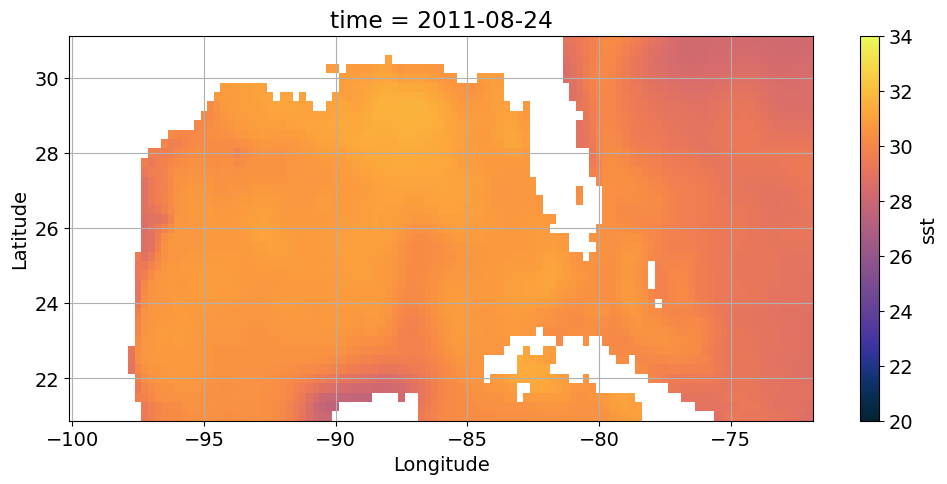

In [20]:
plt.figure(figsize=(12,5))
sst_e[600].plot(cmap = cmocean.cm.thermal, vmin=20, vmax=34)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid();

In [8]:
from xmovie import Movie
%matplotlib inline

In [9]:
def plot_sst(da, fig, tt, *args, **kwargs):
    
    ax = fig.subplots()
    da.isel(time=tt).plot(ax=ax, cmap=cmocean.cm.thermal, vmin=20, vmax=34)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid();
    
    return ax, da

In [21]:
sst_obj_e = Movie(sst_e, plot_sst, input_check=False)

In [22]:
sst_obj_m = Movie(sst_m, plot_sst, input_check=False)

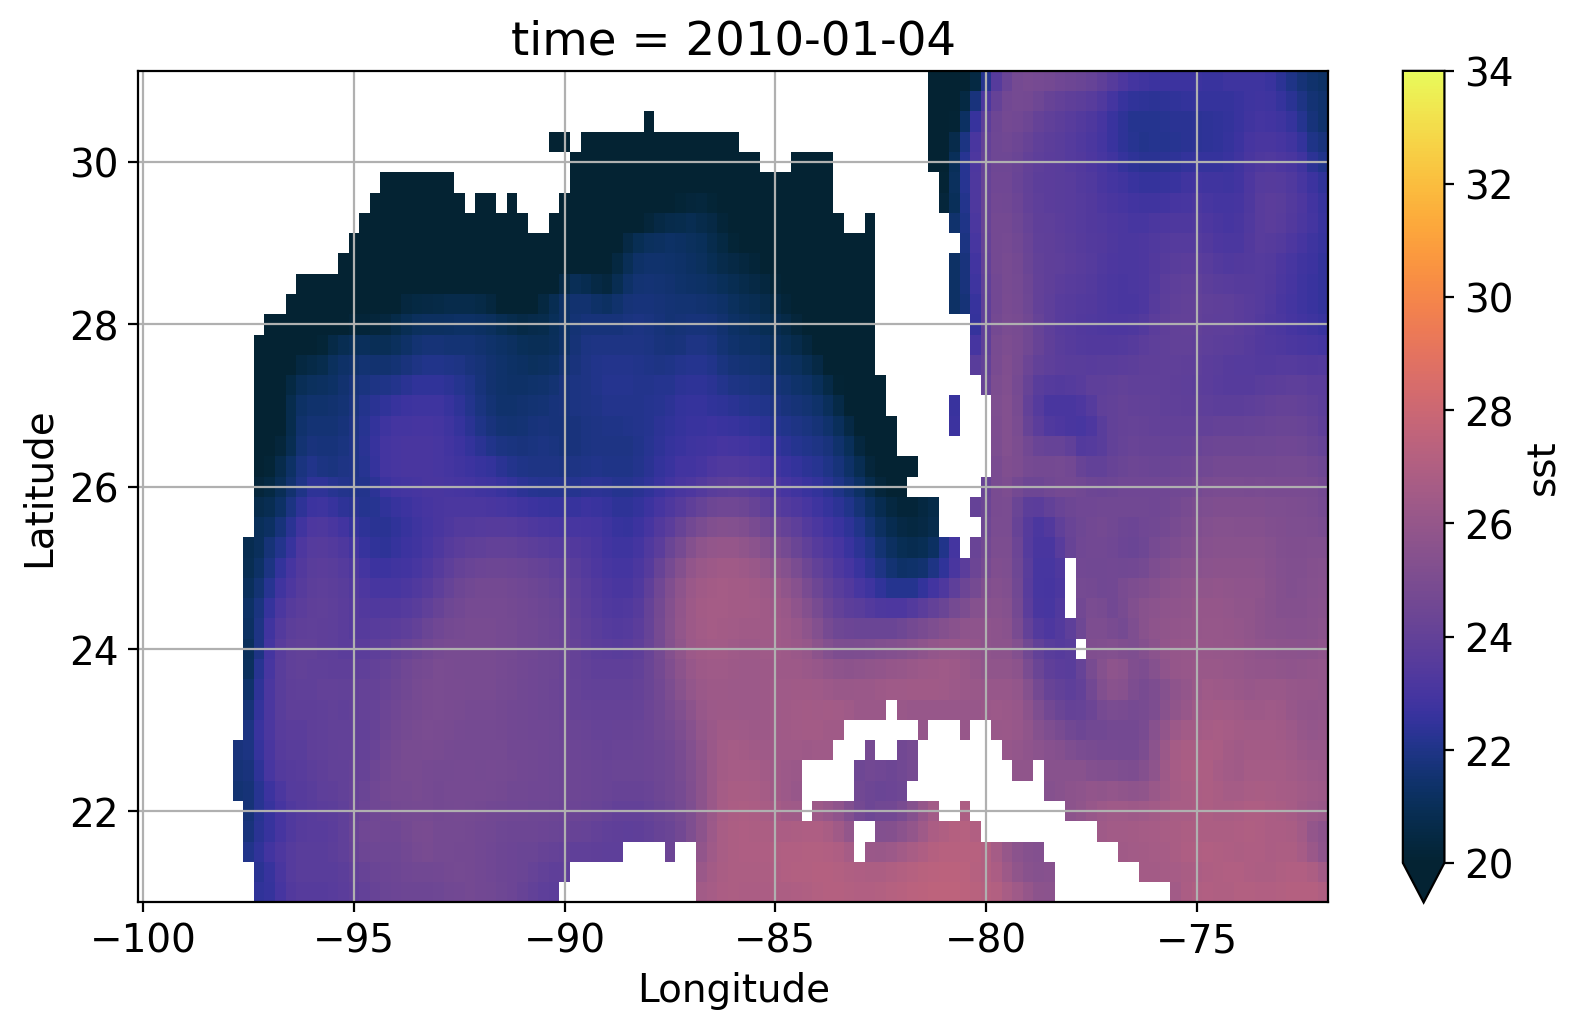

In [23]:
sst_obj_e.preview(3)

In [25]:
sst_obj_e.save('sst_e.mp4', overwrite_existing=True, progress=True,)

  0%|          | 0/5019 [00:00<?, ?it/s]

RuntimeError: Something has gone wrong. Use `verbose=True` to check if ffmpeg displays a problem

In [ ]:
sst_obj_m.save('sst_m.mp4', parallel=True, overwrite_existing=True, progress=True,
         parallel_compute_kwargs=dict(scheduler="processes", num_workers=8))

## 90$^{th}$ Percentile

In [ ]:
sst_e.quantile(q=0.9, dim=['latitude', 'longitude', 'time'])

## Shortwave

In [6]:
## convert from J/m^2 -> W/m^2
era_wm2 = era_hrly / (60*60)
#resample to daily freq (hourly too noisy
era = era_wm2.sel(longitude=slice(-100, -80)).resample(time='D').mean('time')
merra = merra_hrly.sel(lon=slice(-100, -80)).resample(time='D').mean('time')
merra['EFLUXWTR'] = (-merra.EFLUXWTR)
merra['HFLUXWTR'] = (-merra.HFLUXWTR)

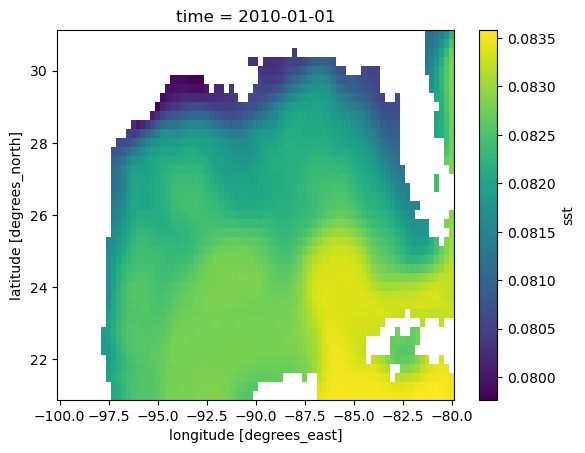

In [6]:
era.sst[0].plot()

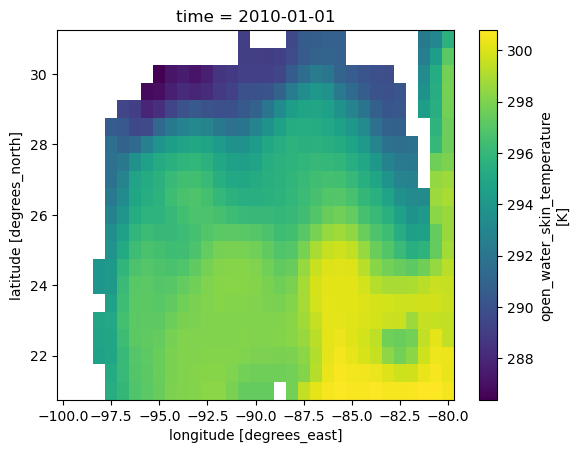

In [7]:
merra.TSKINWTR[0].plot()

In [11]:
era.load()

<xarray.Dataset> Size: 679MB
Dimensions:    (time: 5113, latitude: 41, longitude: 81)
Coordinates:
  * latitude   (latitude) float32 164B 31.0 30.75 30.5 30.25 ... 21.5 21.25 21.0
  * longitude  (longitude) float32 324B -100.0 -99.75 -99.5 ... -80.25 -80.0
  * time       (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    slhf       (time, latitude, longitude) float64 136MB -21.1 -23.72 ... -268.4
    sshf       (time, latitude, longitude) float64 136MB -32.74 ... -52.54
    ssr        (time, latitude, longitude) float64 136MB 136.0 136.4 ... 128.3
    sst        (time, latitude, longitude) float64 136MB nan nan ... 0.08348
    str        (time, latitude, longitude) float64 136MB -99.24 -98.0 ... -60.61
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-21 17:02:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [12]:
merra = merra.chunk({'lat':-1, 'lon':-1}).astype('f8').load()

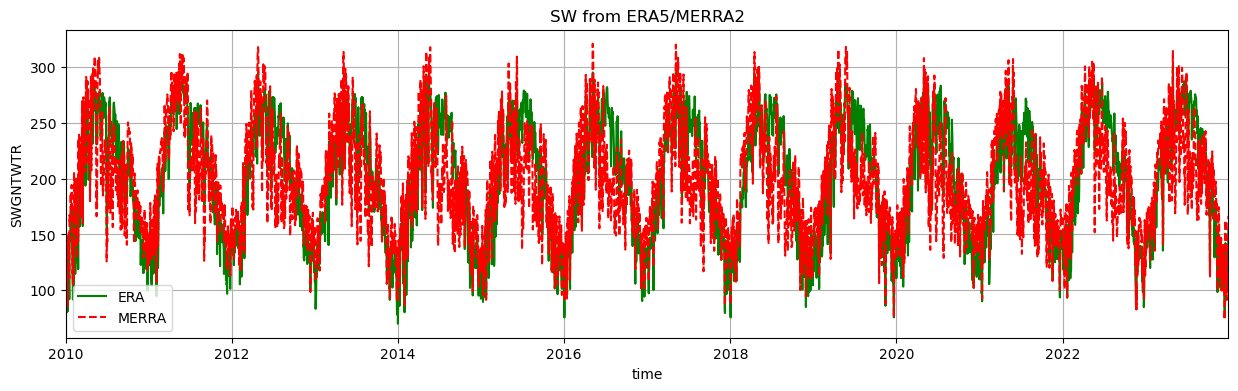

In [10]:
era.ssr.mean(['latitude', 'longitude']).plot(figsize=(15,4), color='green', label='ERA')
#sw_goes.sel(time=slice('2023-01-01', '2023-09-30')).mean(['lat', 'lon']).plot(color='silver', label='GOES')
merra.SWGNTWTR.mean(['lat', 'lon']).plot(color='red', linestyle='--',label='MERRA')
plt.grid()
plt.legend()
plt.xlim(era.time.sel(time='2010-01-01', method='nearest'), 
         era.time.sel(time='2023-12-31', method='nearest'))
plt.title('SW from ERA5/MERRA2');

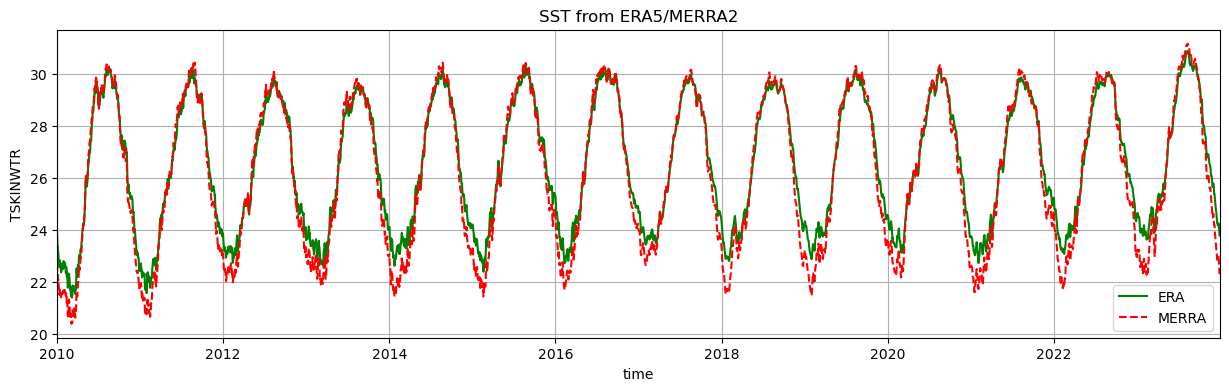

In [11]:
(era_hrly.sst-273.15).resample(time='D').mean().mean(['latitude', 'longitude']).plot(figsize=(15,4), color='green', label='ERA')
#sw_goes.sel(time=slice('2023-01-01', '2023-09-30')).mean(['lat', 'lon']).plot(color='silver', label='GOES')
(merra.TSKINWTR-273.15).mean(['lat', 'lon']).plot(color='red', linestyle='--',label='MERRA')
plt.grid()
plt.legend()
plt.xlim(era.time.sel(time='2010-01-01', method='nearest'), 
         era.time.sel(time='2023-12-31', method='nearest'))
plt.title('SST from ERA5/MERRA2');

In [13]:
sst_e = (era_hrly.sst-273.15).resample(time='D').mean().mean(['latitude', 'longitude'])
sst_m = (merra.TSKINWTR-273.15).mean(['lat', 'lon'])

In [14]:
lr_e = linregress(np.arange(0,5113), sst_e.fillna(0.))
lr_m = linregress(np.arange(0,5113), sst_m.fillna(0.))

In [10]:
lr_e

LinregressResult(slope=0.00023145790520098336, intercept=25.90195404269829, rvalue=0.1393031076218934, pvalue=1.415710667431232e-23, stderr=2.3014578810717936e-05, intercept_stderr=0.06792888515178919)

In [11]:
lr_m

LinregressResult(slope=0.00021878051894655193, intercept=25.621878765423197, rvalue=0.11267032237325916, pvalue=6.4613383607707e-16, stderr=2.6988076130407137e-05, intercept_stderr=0.0796568965701172)

In [12]:
trend_e = (lr_e[0]*np.arange(0, 5113) + lr_e[1])
trend_m = (lr_m[0]*np.arange(0, 5113) + lr_m[1])

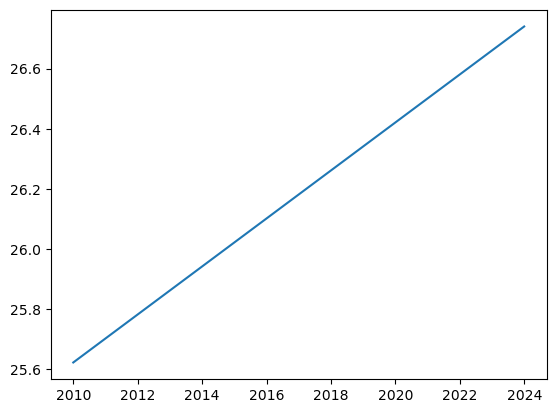

In [23]:
plt.plot(merra.time, trend_m)

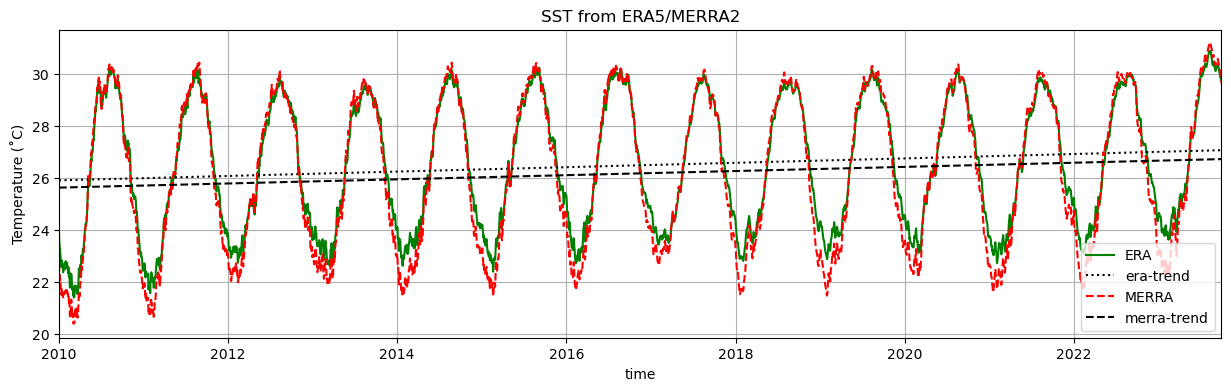

In [24]:
(era_hrly.sst-273.15).resample(time='D').mean().mean(['latitude', 'longitude']).plot(figsize=(15,4), color='green', label='ERA')
plt.plot(era.time, trend_e, label='era-trend', color='k', linestyle='dotted')
sst_m.plot(color='red', linestyle='--',label='MERRA')
plt.plot(merra.time, trend_m, label='merra-trend', color='k', linestyle='--')
plt.grid()
plt.legend()
plt.ylabel('Temperature (˚C)')
plt.xlim(era.time.sel(time='2010-01-01', method='nearest'), 
         era.time.sel(time='2023-10-01', method='nearest'))
plt.title('SST from ERA5/MERRA2');

In [15]:
sst_edaily = (era_hrly.sst-273.15).resample(time='D').mean()
sst_mdaily = merra.TSKINWTR-273.15

sst_clim_e = sst_edaily.groupby('time.month').mean(['time', 'latitude', 'longitude'])
sst_anom_e = sst_edaily.groupby('time.month') - sst_clim_e
sst_clim_m = sst_mdaily.groupby('time.month').mean(['time', 'lat', 'lon'])
sst_anom_m = sst_mdaily.groupby('time.month') - sst_clim_m

sst_emonthly = sst_edaily.resample(time='ME').mean().mean(['latitude', 'longitude'])
sst_mmonthly = sst_mdaily.resample(time='ME').mean().mean(['lat', 'lon'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing with an out-of-order index is generating 14 times more chunks
  return self.array[key]


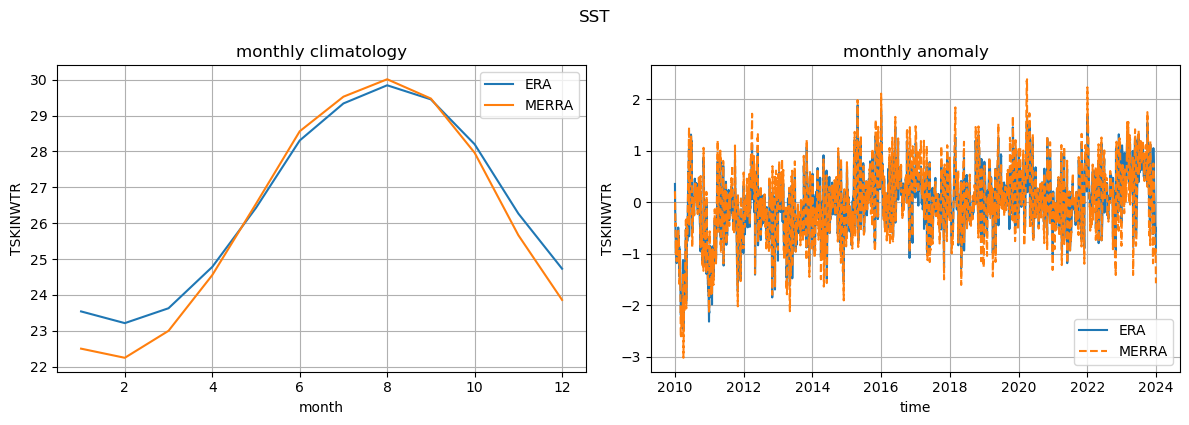

In [136]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

sst_clim_e.plot(ax=ax0, label='ERA')
sst_clim_m.plot(ax=ax0, label='MERRA')
ax0.set_title('monthly climatology')
ax0.grid()
ax0.legend()

sst_anom_e.mean(['latitude', 'longitude']).plot(label='ERA', ax=ax1)
sst_anom_m.mean(['lat', 'lon']).plot(ax=ax1, label='MERRA', linestyle='--')
ax1.set_title('monthly anomaly')
ax1.grid()
ax1.legend()

plt.tight_layout()
plt.suptitle('SST', y=1.05);

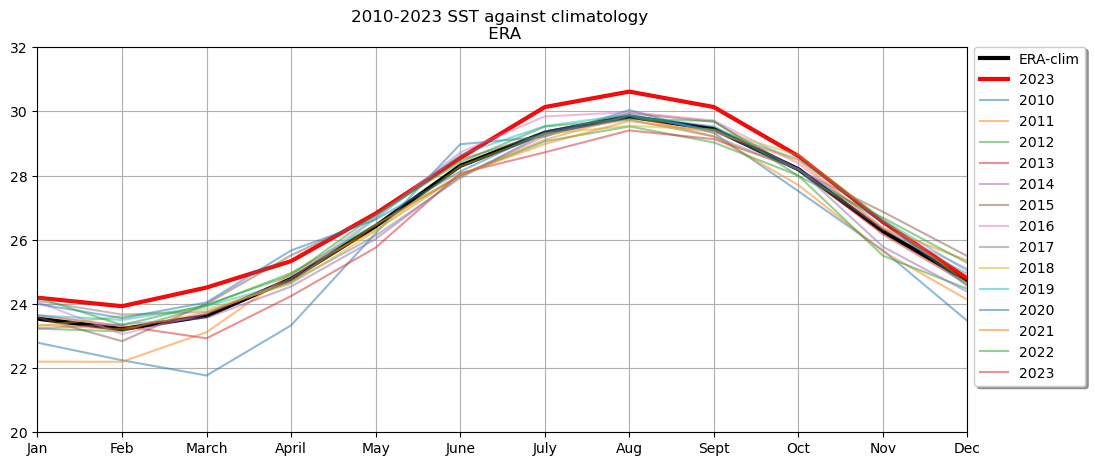

In [16]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', ]

plt.figure(figsize=(12,5))
plt.plot(months, sst_clim_e, label='ERA-clim', color='k', linewidth=3)
plt.plot(months, sst_emonthly.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
plt.xlim('Jan', 'Dec')
plt.grid()
plt.ylim(20,32)
plt.title('2010-2023 SST against climatology \n ERA');

for i in np.unique(sst_emonthly.time.dt.year[:-1]):
    plt.plot(months, sst_emonthly[sst_emonthly.time.dt.year == i], label=f'{i}', alpha=0.5)
    plt.legend(bbox_to_anchor=(1., 1.02), fancybox=True, shadow=True)

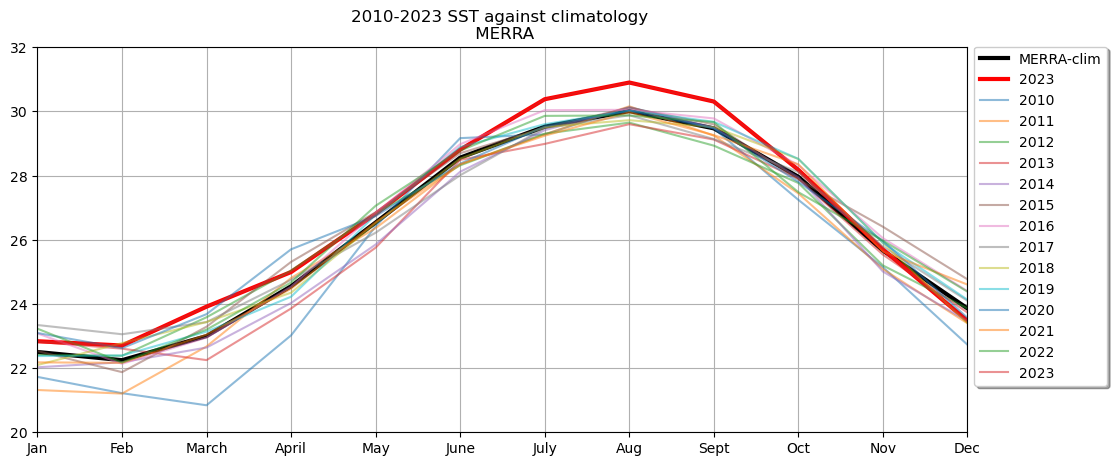

In [17]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', ]

plt.figure(figsize=(12,5))
plt.plot(months, sst_clim_m, label='MERRA-clim', color='k', linewidth=3)
plt.plot(months, sst_mmonthly.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
plt.xlim('Jan', 'Dec')
plt.grid()
plt.ylim(20,32)
plt.title('2010-2023 SST against climatology \n MERRA');

for i in np.unique(sst_mmonthly.time.dt.year[:-1]):
    plt.plot(months, sst_mmonthly[sst_mmonthly.time.dt.year == i], label=f'{i}', alpha=0.5)
    plt.legend(bbox_to_anchor=(1., 1.02), fancybox=True, shadow=True)

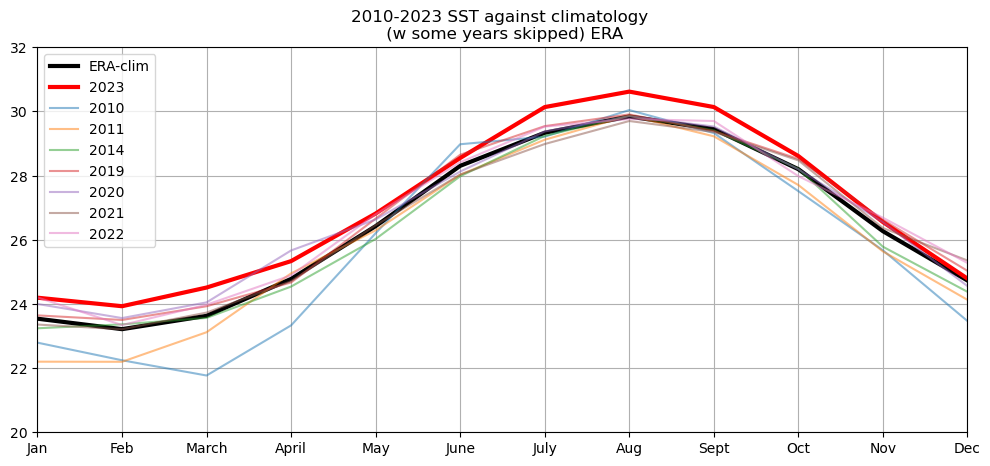

In [18]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', ]
yrs2keep = ['2010', '2011', '2014', '2019', '2020', '2021', '2022']
#years = np.arange(12, 180, 12)
#labels = [str(x) for x in sst_edaily.groupby('time.year').mean().year.values]
#drop_index = [2,3,5,6,7,8]

plt.figure(figsize=(12,5))
plt.plot(months, sst_clim_e, label='ERA-clim', color='k', linewidth=3)
plt.plot(months, sst_emonthly.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
plt.xlim('Jan', 'Dec')
plt.grid()
plt.ylim(20,32)
plt.title('2010-2023 SST against climatology \n (w some years skipped) ERA');

for i in np.unique(sst_emonthly.time.dt.year):
    if str(i) in yrs2keep:
        plt.plot(months, sst_emonthly[sst_emonthly.time.dt.year == i], label=f'{i}', alpha=0.5)
        plt.legend()

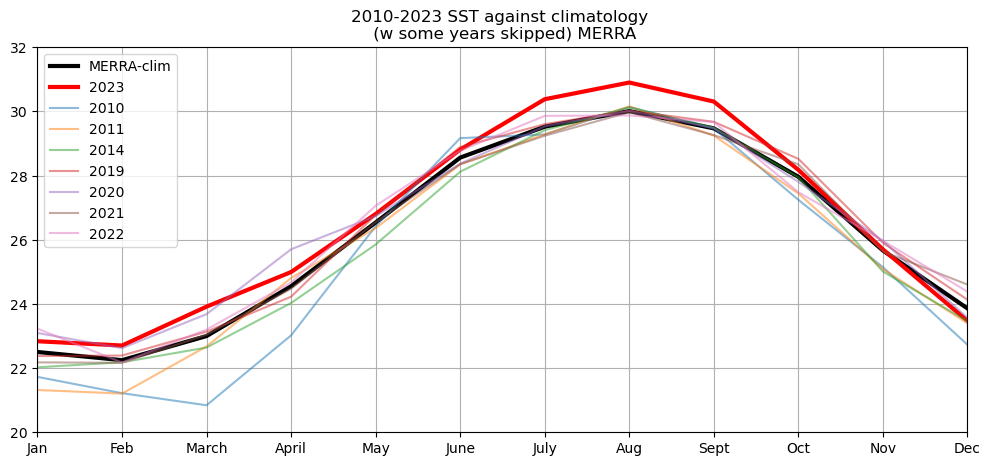

In [19]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', ]
yrs2keep = ['2010', '2011', '2014', '2019', '2020', '2021', '2022']
#years = np.arange(12, 180, 12)
#labels = [str(x) for x in sst_edaily.groupby('time.year').mean().year.values]
#drop_index = [2,3,5,6,7,8]

plt.figure(figsize=(12,5))
plt.plot(months, sst_clim_m, label='MERRA-clim', color='k', linewidth=3)
plt.plot(months, sst_mmonthly.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
plt.xlim('Jan', 'Dec')
plt.grid()
plt.ylim(20,32)
plt.title('2010-2023 SST against climatology \n (w some years skipped) MERRA');

for i in np.unique(sst_mmonthly.time.dt.year):
    if str(i) in yrs2keep:
        plt.plot(months, sst_mmonthly[sst_emonthly.time.dt.year == i], label=f'{i}', alpha=0.5)
        plt.legend()

In [132]:
import numpy as np

for (i,j) in zip(np.arange(1,13), range(12)):
    print(i,': ', f'{sst_clim_e.values[j]}')

1 :  23.54005519242756
2 :  23.21405616440484
3 :  23.628726747206695
4 :  24.78042284658524
5 :  26.425714554498
6 :  28.304328225558553
7 :  29.336493817295914
8 :  29.842446115216063
9 :  29.449644071201167
10 :  28.199768814841534
11 :  26.267375179612188
12 :  24.730202251708803


In [133]:
for (i,j) in zip(np.arange(1,13), range(12)):
    print(i,': ', f'{sst_clim_m.values[j]}')

1 :  22.50244140625
2 :  22.247638702392578
3 :  22.99968719482422
4 :  24.55264663696289
5 :  26.53858757019043
6 :  28.560779571533203
7 :  29.524829864501953
8 :  30.010498046875
9 :  29.472936630249023
10 :  27.962230682373047
11 :  25.66460418701172
12 :  23.860687255859375


## Plot surf fluxes 

In [20]:
mo_clim_e = era.groupby('time.month').mean(['time', 'latitude', 'longitude'])
mo_anom_e = era.groupby('time.month') - mo_clim_e
mo_clim_m = merra.groupby('time.month').mean(['time', 'lat', 'lon'])
mo_anom_m = merra.groupby('time.month') - mo_clim_m

emonthly = era.resample(time='ME').mean().mean(['latitude', 'longitude'])
mmonthly = merra.resample(time='ME').mean().mean(['lat', 'lon'])

In [21]:
emonthly

<xarray.Dataset> Size: 8kB
Dimensions:  (time: 168)
Coordinates:
  * time     (time) datetime64[ns] 1kB 2010-01-31 2010-02-28 ... 2023-12-31
Data variables:
    slhf     (time) float64 1kB -152.9 -149.2 -126.6 ... -162.9 -151.0 -150.7
    sshf     (time) float64 1kB -39.12 -39.3 -27.71 ... -26.22 -25.91 -23.36
    ssr      (time) float64 1kB 126.1 149.1 210.3 237.7 ... 175.7 133.7 116.8
    sst      (time) float64 1kB 0.08203 0.08187 0.08175 ... 0.08319 0.08265
    str      (time) float64 1kB -70.27 -67.53 -78.65 ... -63.25 -61.17 -66.51

In [22]:
mo_clim_e

<xarray.Dataset> Size: 576B
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slhf     (month) float64 96B -136.6 -106.6 -107.4 ... -149.6 -150.6 -129.7
    sshf     (month) float64 96B -30.35 -25.17 -24.82 ... -23.29 -25.96 -24.5
    ssr      (month) float64 96B 133.6 163.9 208.5 242.6 ... 180.3 141.4 124.4
    sst      (month) float64 96B 0.08227 0.08219 0.08235 ... 0.08311 0.08264
    str      (month) float64 96B -68.82 -65.02 -69.93 ... -64.93 -65.92 -65.12
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-21 17:02:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [59]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', ]

def plot_clim_years(da, da_clim, model, flux, legend_xloc):
    plt.figure(figsize=(12,5))
    plt.plot(months, da_clim, label=f'{model}-clim', color='k', linewidth=3)
    plt.plot(months, da.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
    
    for i in np.unique(da.time.dt.year)[:-1]:
        plt.plot(months, da[da.time.dt.year == i], label=f'{i}', alpha=0.5)
    plt.legend(bbox_to_anchor=(legend_xloc, 1.02), fancybox=True, shadow=True)
    plt.xlim('Jan', 'Dec')
    plt.grid()
    plt.title(f'2010-2023 {flux} against climatology \n {model}')
    plt.ylabel(r'W m$^{-2}$');


def plot_clim_some_yrs(da, da_clim, model, flux, legend_xloc):    
    plt.figure(figsize=(12,5))
    plt.plot(months, da_clim, label=f'{model}-clim', color='k', linewidth=3)
    plt.plot(months, da.sel(time=slice('2023', '2023')), label='2023', linewidth=3, color='red')
    plt.xlim('Jan', 'Dec')
    plt.grid()
    plt.title(f'2010-2023 {flux} against climatology \n (w some years skipped) {model}')
    
    yrs2keep = ['2010', '2011', '2014', '2019', '2020', '2021', '2022']
    for i in np.unique(da.time.dt.year):
        if str(i) in yrs2keep:
            plt.plot(months, da[da.time.dt.year == i], label=f'{i}', alpha=0.5)
            plt.legend(bbox_to_anchor=(legend_xloc, 1.02), fancybox=True, shadow=True)

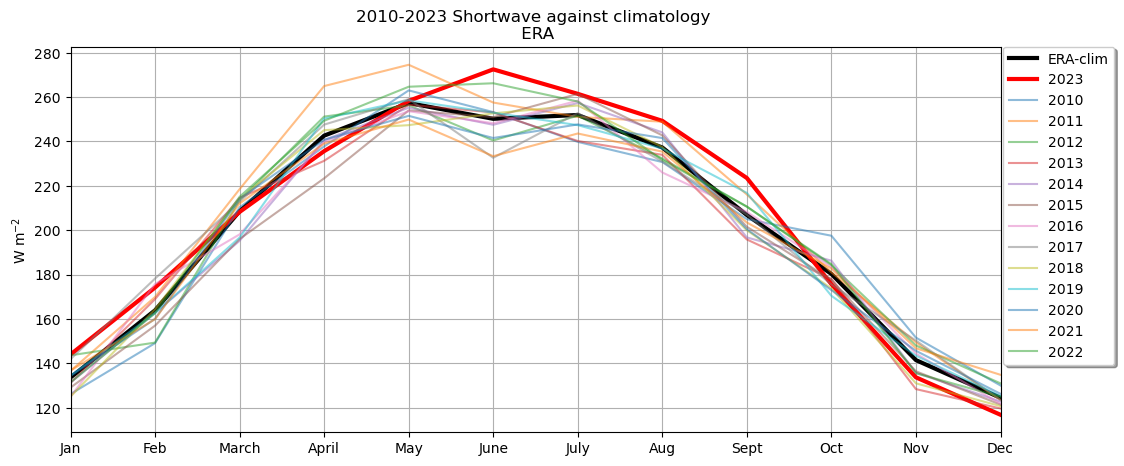

In [49]:
plot_clim_years(emonthly.ssr, mo_clim_e.ssr, 'ERA', 'Shortwave', 1.13)

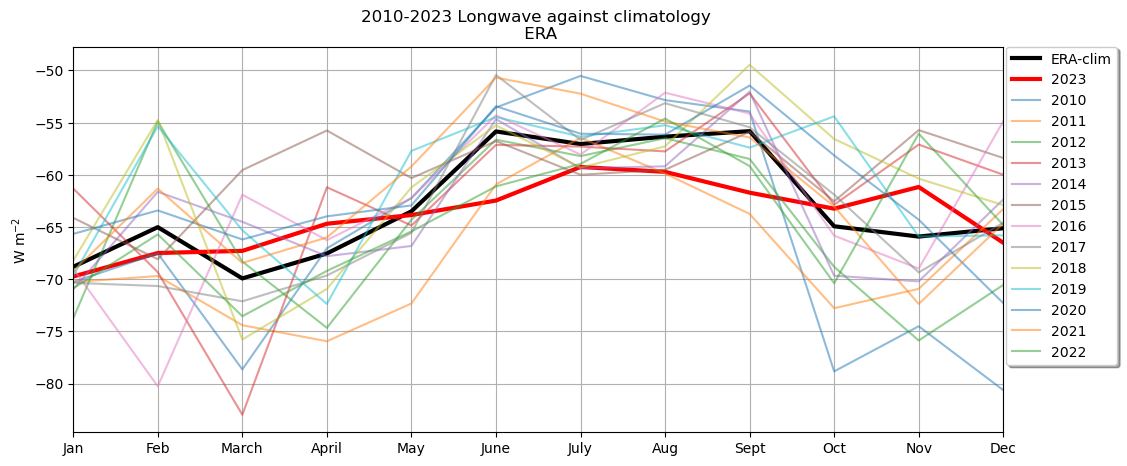

In [50]:
plot_clim_years(emonthly.str, mo_clim_e.str, 'ERA', 'Longwave', 1.13)

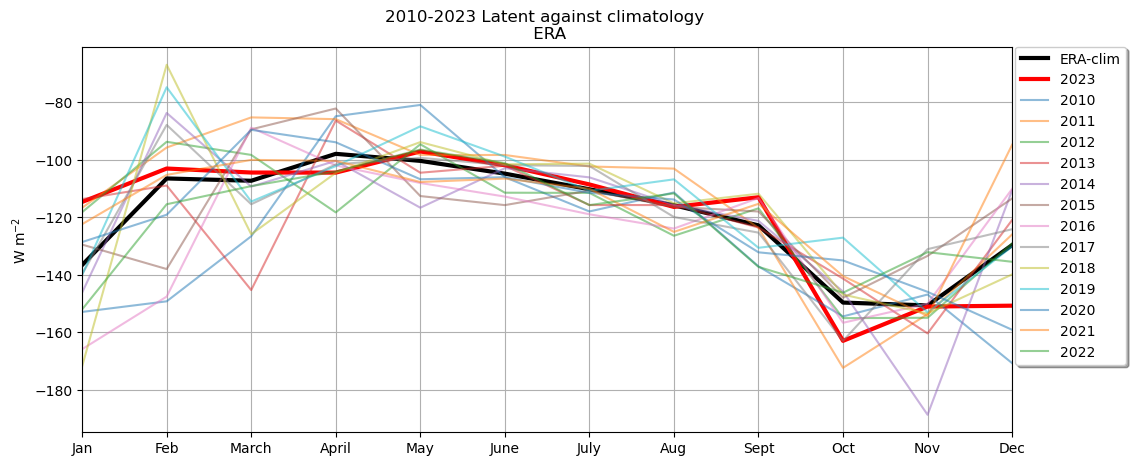

In [51]:
plot_clim_years(emonthly.slhf, mo_clim_e.slhf, 'ERA', 'Latent', 1.13)

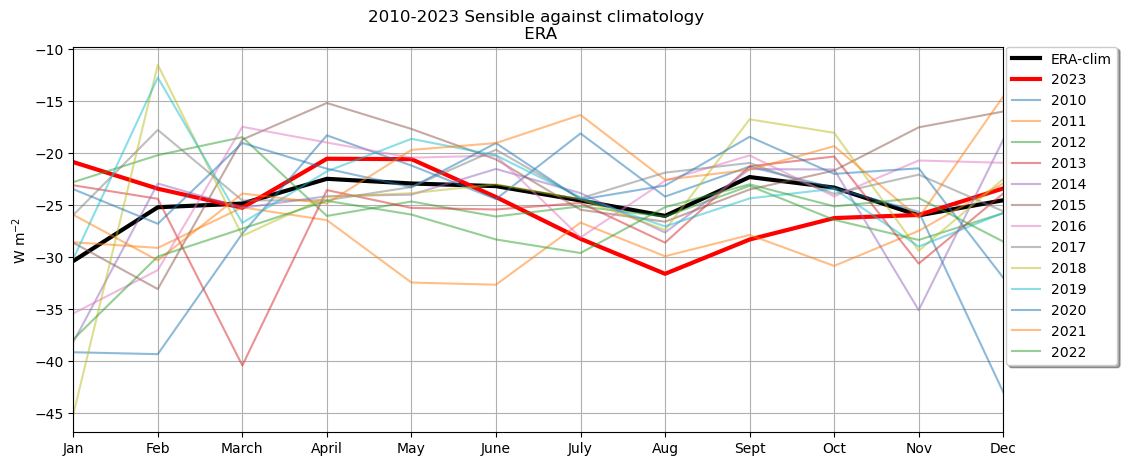

In [52]:
plot_clim_years(emonthly.sshf, mo_clim_e.sshf, 'ERA', 'Sensible', 1.13)

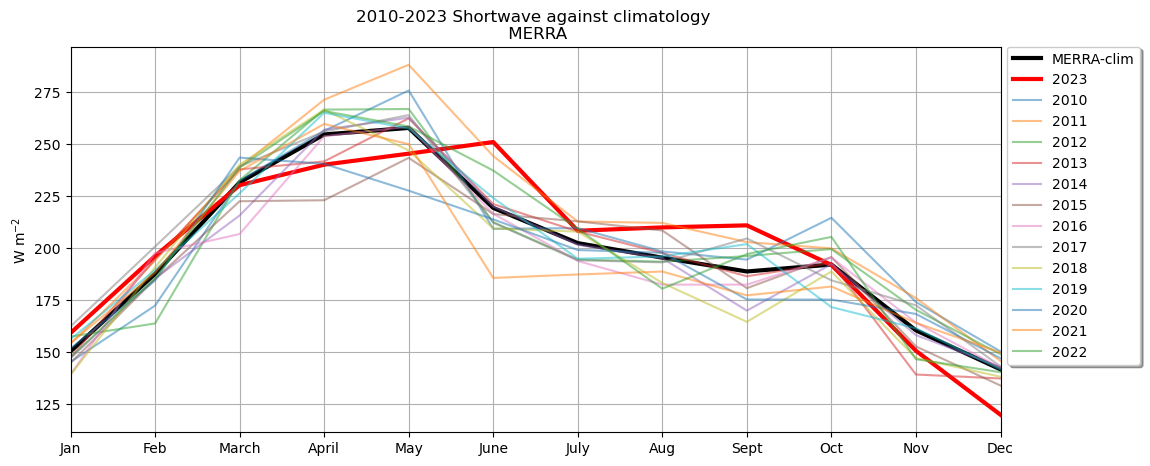

In [54]:
plot_clim_years(mmonthly.SWGNTWTR, mo_clim_m.SWGNTWTR, 'MERRA', 'Shortwave', 1.)

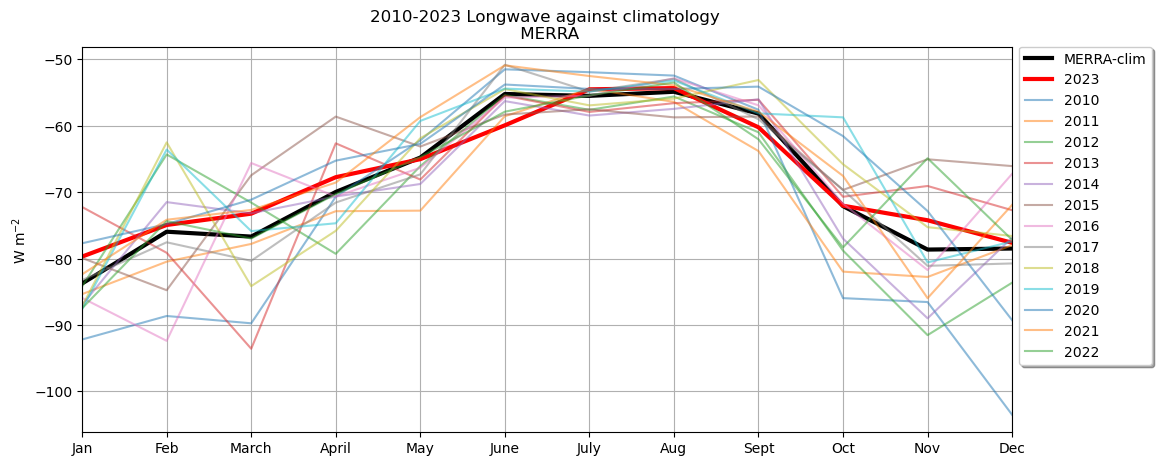

In [55]:
plot_clim_years(mmonthly.LWGNTWTR, mo_clim_m.LWGNTWTR, 'MERRA', 'Longwave', 1)

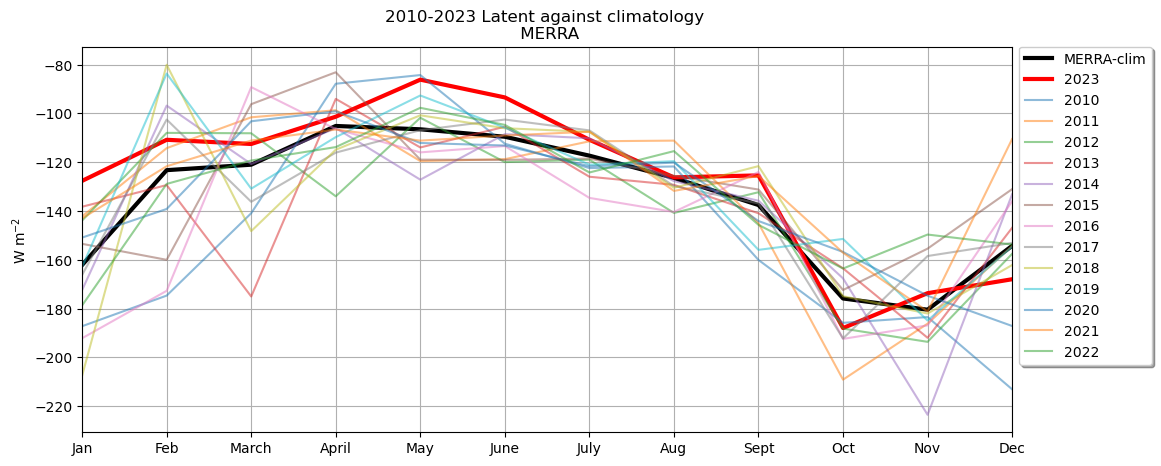

In [56]:
plot_clim_years(mmonthly.EFLUXWTR, mo_clim_m.EFLUXWTR, 'MERRA', 'Latent', 1)

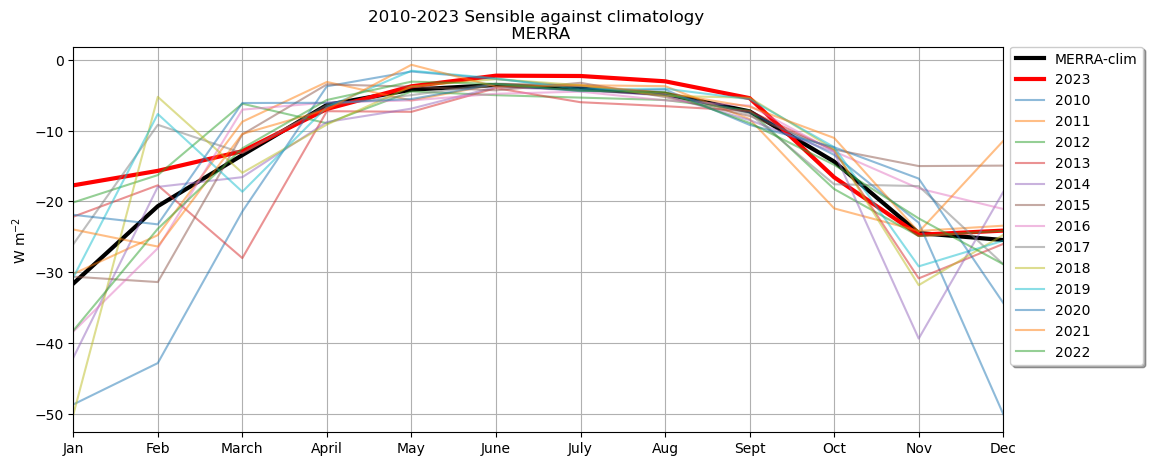

In [57]:
plot_clim_years(mmonthly.HFLUXWTR, mo_clim_m.HFLUXWTR, 'MERRA', 'Sensible', 1)

## Plot some years

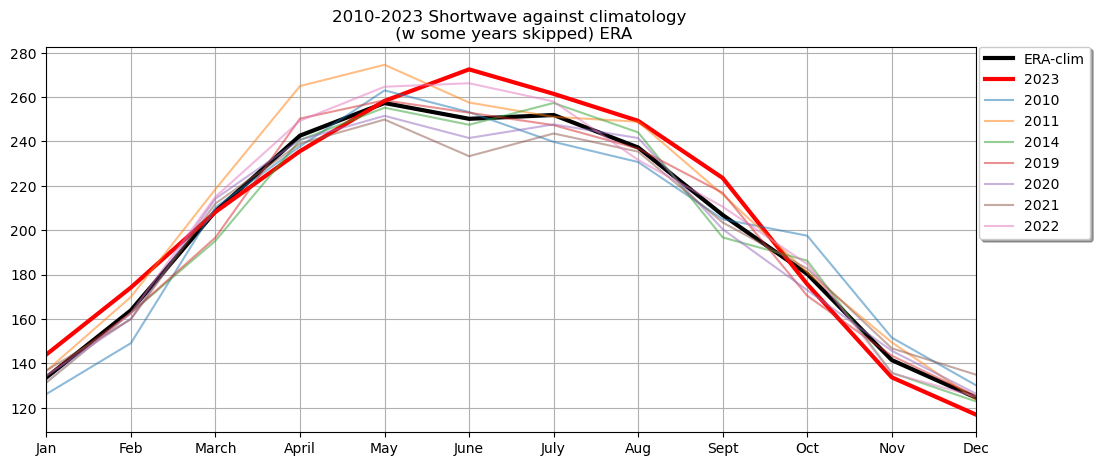

In [263]:
plot_clim_some_yrs(emonthly.ssr, mo_clim_e.ssr, 'ERA', 'Shortwave')

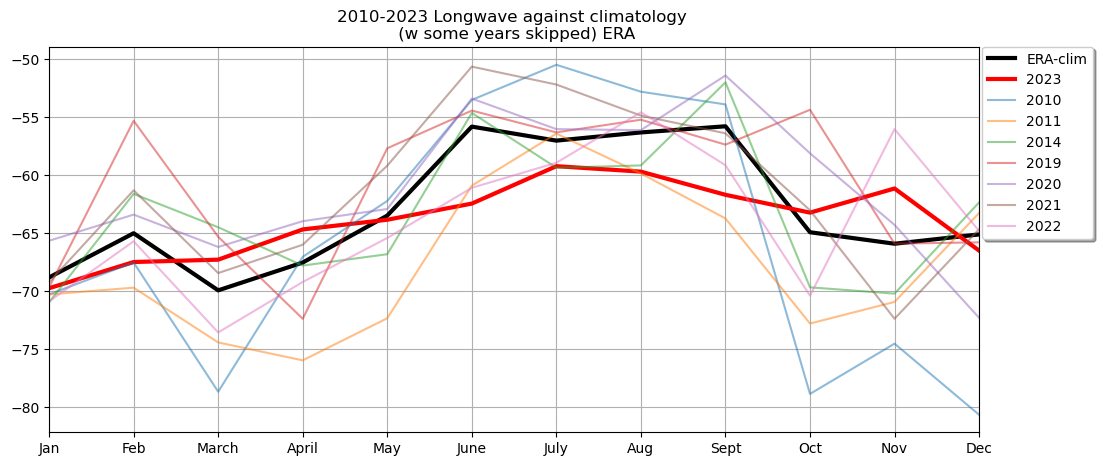

In [264]:
plot_clim_some_yrs(emonthly.str, mo_clim_e.str, 'ERA', 'Longwave')

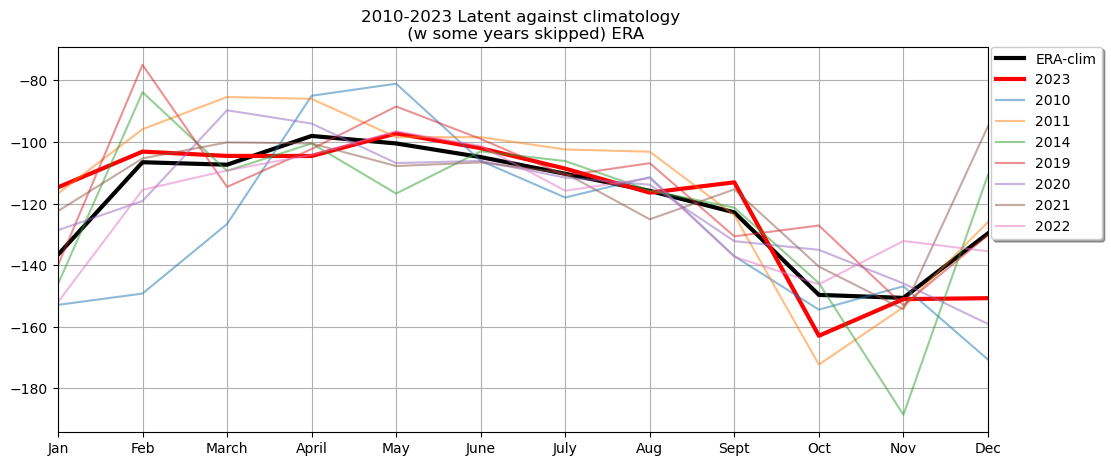

In [265]:
plot_clim_some_yrs(emonthly.slhf, mo_clim_e.slhf, 'ERA', 'Latent')

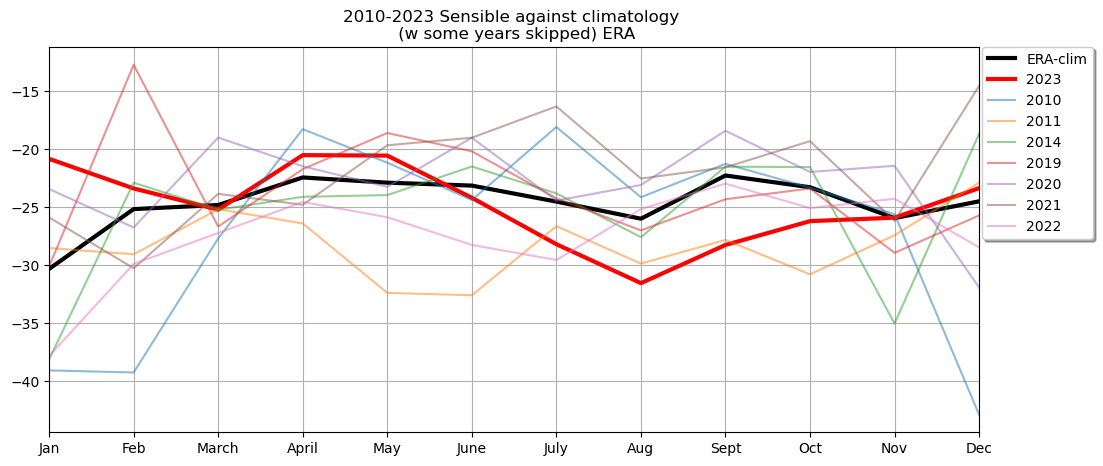

In [266]:
plot_clim_some_yrs(emonthly.sshf, mo_clim_e.sshf, 'ERA', 'Sensible')

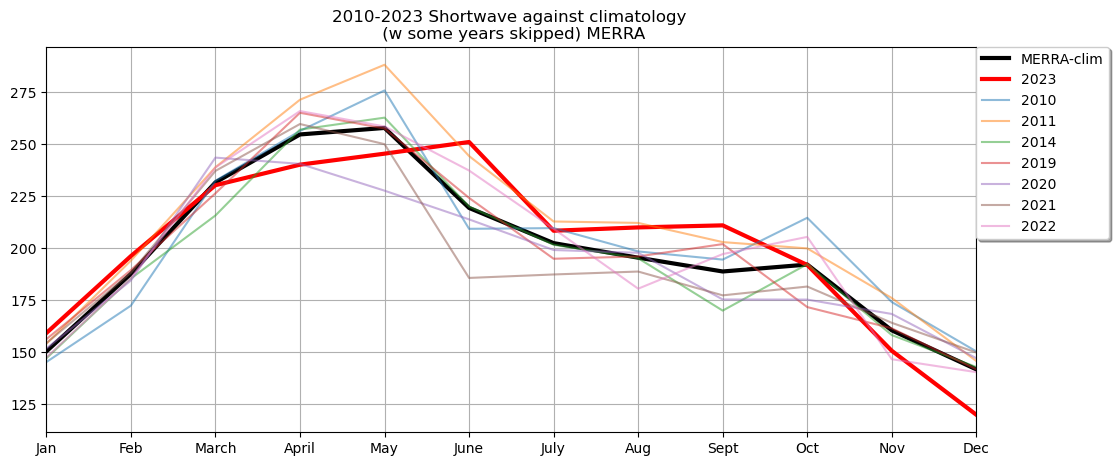

In [64]:
plot_clim_some_yrs(mmonthly.SWGNTWTR, mo_clim_m.SWGNTWTR, 'MERRA', 'Shortwave', 1.15)

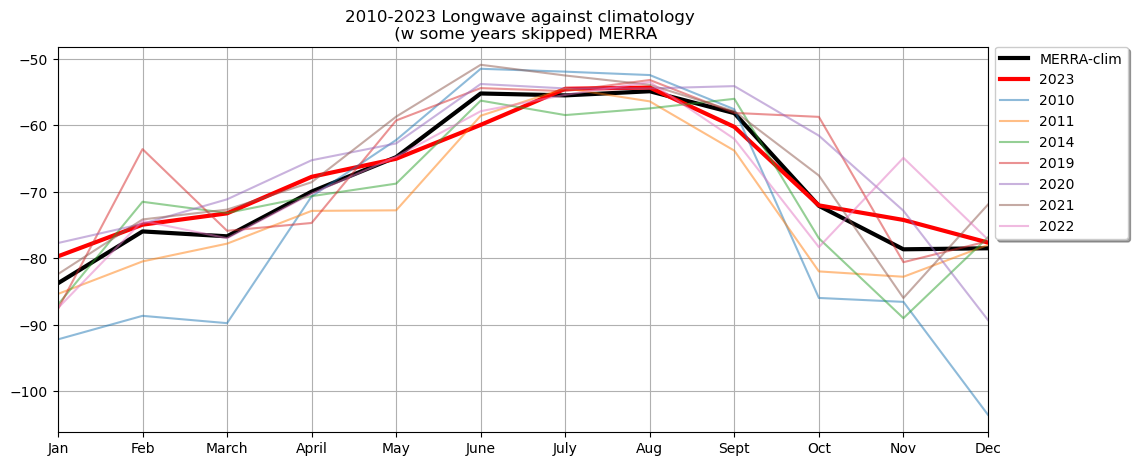

In [68]:
plot_clim_some_yrs(mmonthly.LWGNTWTR, mo_clim_m.LWGNTWTR, 'MERRA', 'Longwave', 1.)

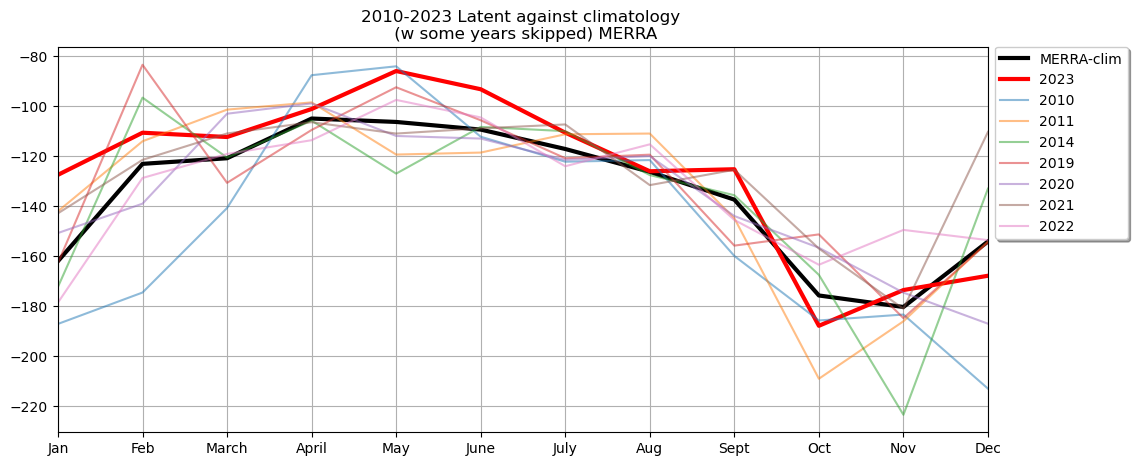

In [69]:
plot_clim_some_yrs(mmonthly.EFLUXWTR, mo_clim_m.EFLUXWTR, 'MERRA', 'Latent', 1.)

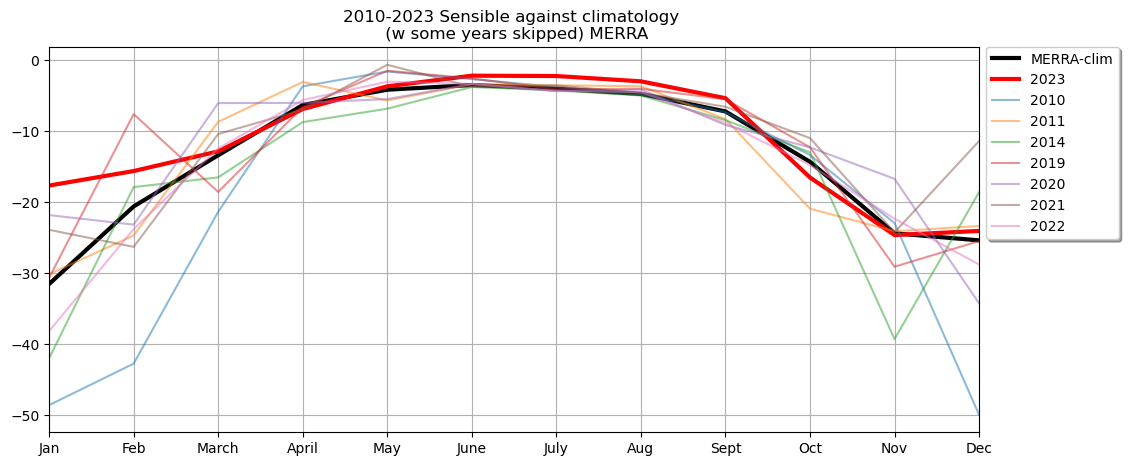

In [70]:
plot_clim_some_yrs(mmonthly.HFLUXWTR, mo_clim_m.HFLUXWTR, 'MERRA', 'Sensible', 1)

In [159]:
def plot_clims(da_e, da_m, fig_title):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

    mo_clim_e[f'{da_e}'].plot(ax=ax0, label='ERA')
    mo_clim_m[f'{da_m}'].plot(ax=ax0, label='MERRA')
    ax0.set_title('monthly climatology')
    ax0.grid()
    ax0.legend()
    
    mo_anom_e[f'{da_e}'].mean(['latitude', 'longitude']).plot(label='ERA', ax=ax1)
    mo_anom_m[f'{da_m}'].mean(['lat', 'lon']).plot(ax=ax1, label='MERRA', linestyle='--')
    ax1.set_title('monthly anomaly')
    ax1.grid()
    ax1.legend()
    
    plt.tight_layout()
    plt.suptitle(f'{fig_title}', y=1.05);

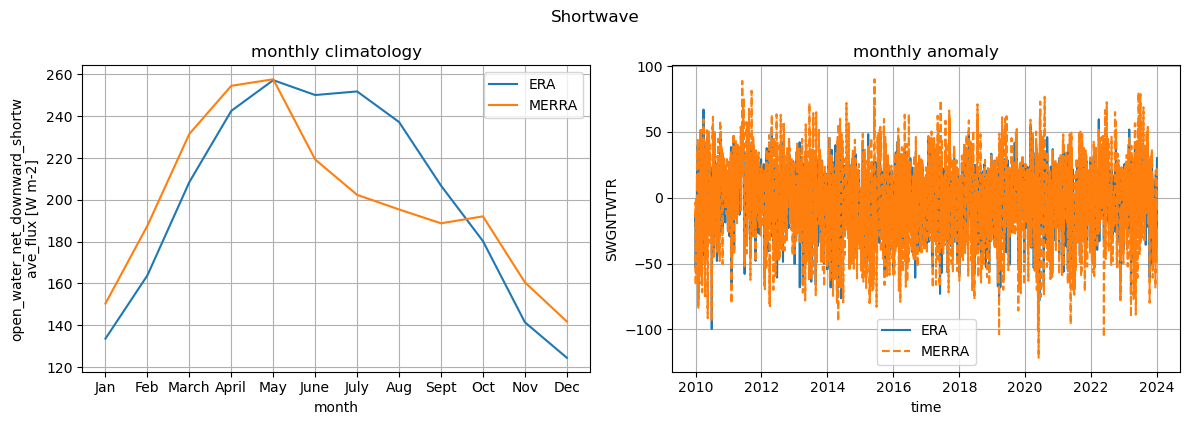

In [160]:
plot_clims('ssr', 'SWGNTWTR', 'Shortwave')

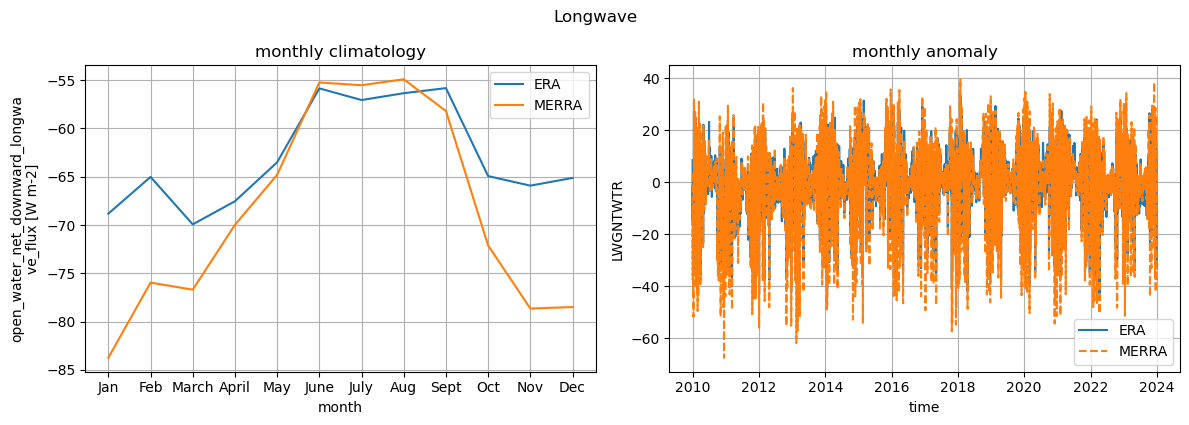

In [161]:
plot_clims('str', 'LWGNTWTR', 'Longwave')

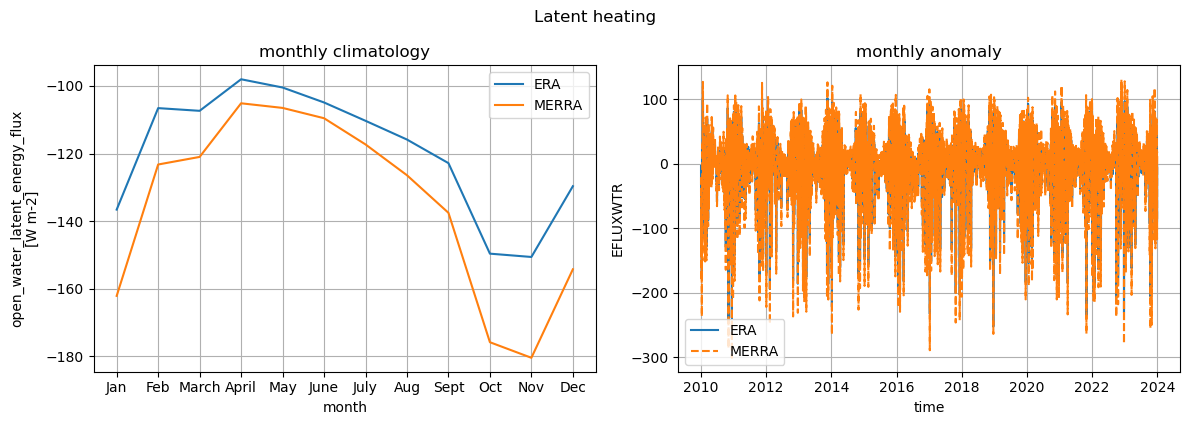

In [162]:
plot_clims('slhf', 'EFLUXWTR', 'Latent heating')

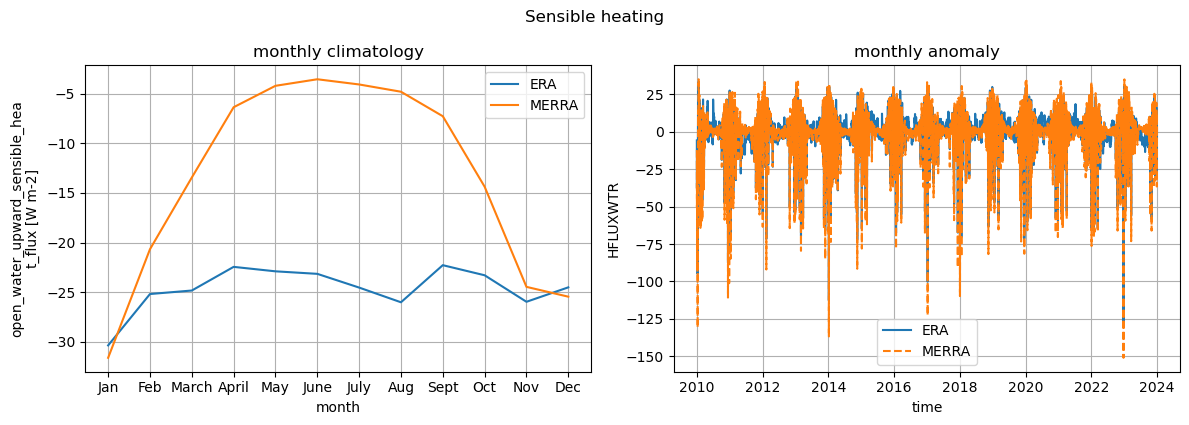

In [163]:
plot_clims('sshf', 'HFLUXWTR', 'Sensible heating')

## Detrended Shortwave

In [17]:
detrend_e = xr.apply_ufunc(detrend, era.fillna(0.), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[era.ssr.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [18]:
detrend_m = xr.apply_ufunc(detrend, merra.fillna(0.), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[merra.SWGNTWTR.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [19]:
detrend_e

<xarray.Dataset> Size: 1GB
Dimensions:    (latitude: 41, longitude: 113, time: 5019)
Coordinates:
  * latitude   (latitude) float32 164B 21.0 21.25 21.5 21.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 40kB 2010-01-01 2010-01-02 ... 2023-09-28
Data variables:
    slhf       (latitude, longitude, time) float64 186MB 42.24 41.75 ... 135.0
    sshf       (latitude, longitude, time) float64 186MB 40.03 33.83 ... 7.147
    ssr        (latitude, longitude, time) float64 186MB -150.8 ... -191.6
    sst        (latitude, longitude, time) float64 186MB 0.0 0.0 ... -0.08276
    str        (latitude, longitude, time) float64 186MB 42.89 33.69 ... 28.44
    ssrd       (latitude, longitude, time) float64 186MB 0.0 0.0 ... 62.22 -46.2
    strd       (latitude, longitude, time) float64 186MB 0.0 0.0 ... 335.6 345.7

In [20]:
detrend_m

<xarray.Dataset> Size: 95MB
Dimensions:   (lat: 21, lon: 45, time: 5019)
Coordinates:
  * lat       (lat) float64 168B 21.0 21.5 22.0 22.5 ... 29.5 30.0 30.5 31.0
  * lon       (lon) float64 360B -100.0 -99.38 -98.75 ... -73.75 -73.12 -72.5
  * time      (time) datetime64[ns] 40kB 2010-01-01 2010-01-02 ... 2023-09-28
Data variables:
    EFLUXWTR  (lat, lon, time) float32 19MB 0.0 0.0 0.0 ... 94.53 42.83 -13.85
    HFLUXWTR  (lat, lon, time) float32 19MB 0.0 0.0 0.0 ... 9.043 6.941 1.803
    LWGNTWTR  (lat, lon, time) float32 19MB 0.0 0.0 0.0 0.0 ... 12.0 21.31 20.73
    SWGNTWTR  (lat, lon, time) float32 19MB 0.0 0.0 0.0 ... 11.21 -43.58 -66.16
    TSKINWTR  (lat, lon, time) float32 19MB 0.0 0.0 0.0 0.0 ... 2.288 2.29 2.237

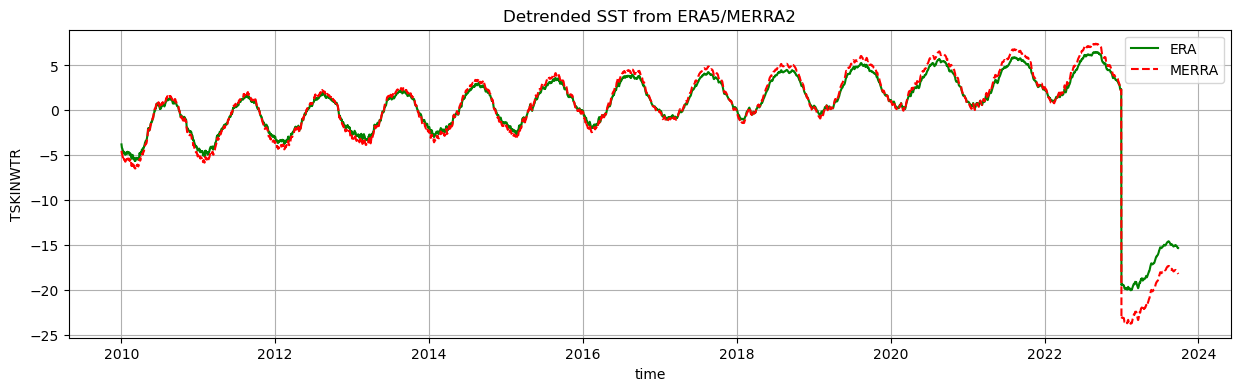

In [38]:
#multiply by hrs in a day to get back era sst values
(detrend_e.sst*60*60).mean(['latitude', 'longitude']).isel(time=slice(None, -1)).plot(figsize=(15,4), color='green', label='ERA')
(detrend_m.TSKINWTR).mean(['lat', 'lon']).plot(color='red', linestyle='--',label='MERRA')
plt.grid()
plt.legend()
plt.title('Detrended SST from ERA5/MERRA2');

In [23]:
mo_clim_de = detrend_e.groupby('time.month').mean(['time']).mean(['latitude', 'longitude'])
mo_anom_de = detrend_e.groupby('time.month') - mo_clim_de

mo_clim_dm = detrend_m.groupby('time.month').mean(['time']).mean(['lat', 'lon'])
mo_anom_dm = detrend_m.groupby('time.month') - mo_clim_dm

In [24]:
def plot_detrended_clims(da_e, da_m, fig_title):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

    mo_clim_de[f'{da_e}'].plot(ax=ax0, label='ERA')
    mo_clim_dm[f'{da_m}'].plot(ax=ax0, label='MERRA')
    ax0.set_title('monthly climatology detrended')
    ax0.grid()
    ax0.legend()
    
    mo_anom_de[f'{da_e}'].mean(['latitude', 'longitude']).plot(label='ERA', ax=ax1)
    mo_anom_dm[f'{da_m}'].mean(['lat', 'lon']).plot(ax=ax1, label='MERRA', linestyle='--')
    ax1.set_title('monthly anomaly detrended')
    ax1.grid()
    ax1.legend()
    
    plt.tight_layout()
    plt.suptitle(f'{fig_title} - detrended', y=1.05);

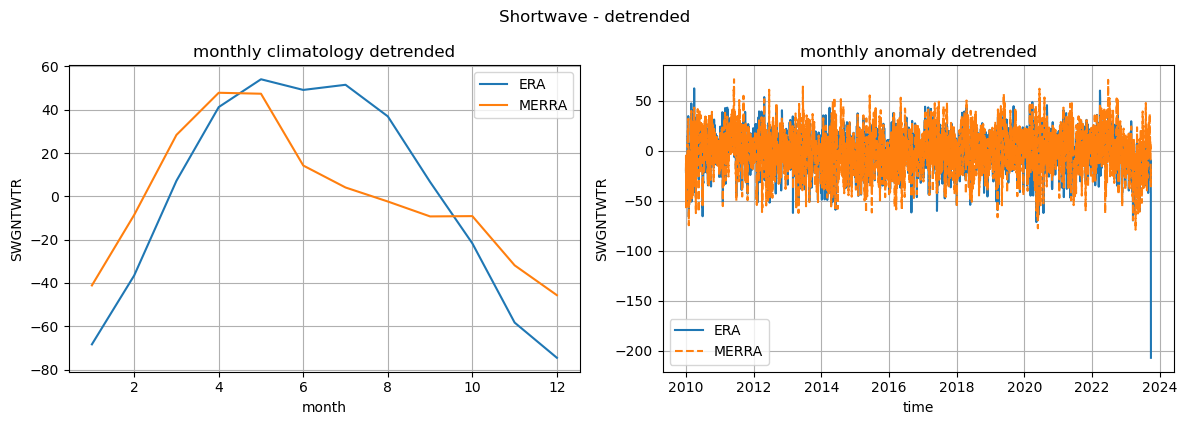

In [25]:
plot_detrended_clims('ssr', 'SWGNTWTR', 'Shortwave')

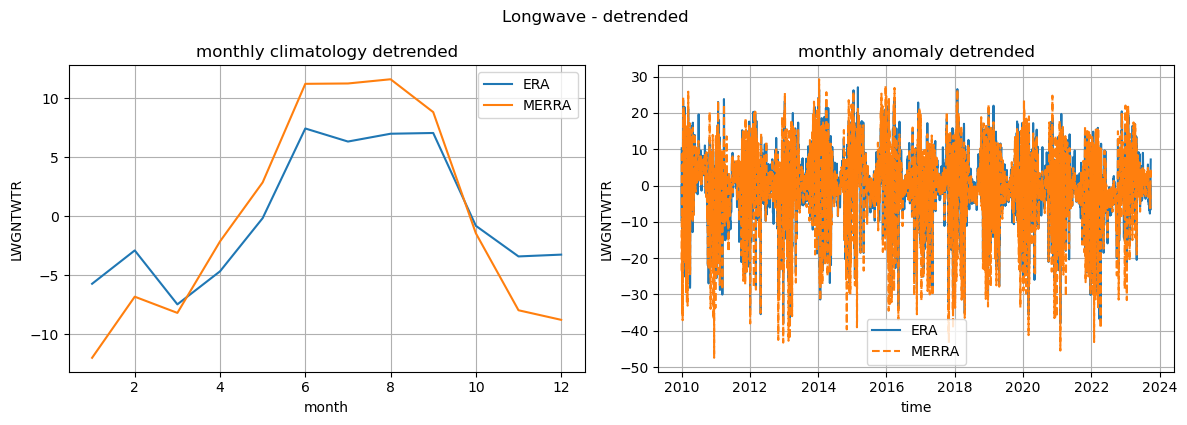

In [26]:
plot_detrended_clims('str', 'LWGNTWTR', 'Longwave')

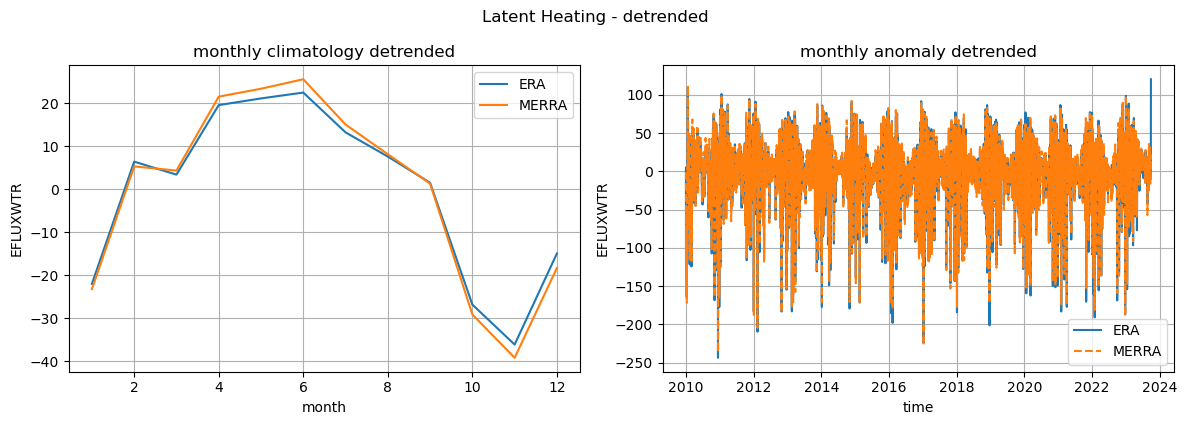

In [27]:
plot_detrended_clims('slhf', 'EFLUXWTR', 'Latent Heating')

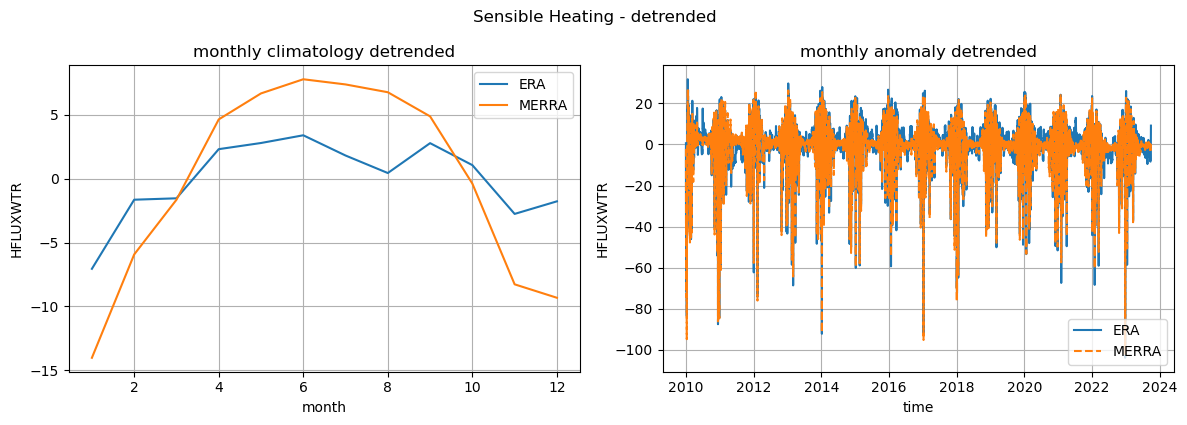

In [28]:
plot_detrended_clims('sshf', 'HFLUXWTR', 'Sensible Heating')